# NLTK (Natural Language Toolkit) package

## What is that?
**NLTK** (stands for Natural Language Toolkit) is one of the most popular libraries for natural language processing (NLP). It is written in Python, has a lot of useful methods, as well as lots of tutorials and very supportive community.

What is NLP? 

The aim of NLP is to achieve that *computers can understand human languages*. Here are some practical examples of NLP procedures:
* speech recognition;
* understanding synonyms;
* sentence analysis;

etc.

## What for?
Here are some examples of NLP that you have definitely used:
* **Search engines** - many popular search engines like Google, Yandex, etc. show the most relevant results for each user, depending on your search history and interests.
* **Spam filters** - using NLP techniques, modern spam filters can understand the aim of the e-mail and quite precisely detect whether it is spam or ham.
* **Conversational agents and Chatbots** - Siri by Apple and other agents understand you and can reply to you because of NLP.
* **Social networks** - giants like Instagram and Facebook show posts and pictures in your feed that you could be interested in the most. How do they achieve it? NLP.
* **Plagiarism detection**

By using NLTK library, be sure that you will be able to achieve it, too.

### First steps

Make sure that you have NLTK installed on your computer. In case it isn't, run this command in your terminal/cmd: `# pip install nltk` or `conda install -c anaconda nltk` (for Anaconda users)

Next, import NLTK library and install the packages. You can easily install all as they are not that heavy.

In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

### Classical operations with NLTK

As we're talking about NLP, it's common to split text into tokens. Most popular approaches is tokenization by sentences **sent_tokenize**, words **word_tokenize** and word and punctuation tokenization (in case you want to retrieve text only) **wordpunct_tokenize**. These approaches can be seen below:

In [31]:
from nltk.tokenize import sent_tokenize, word_tokenize, wordpunct_tokenize

text = "NLTK (stands for Natural Language Toolkit) is one of the most popular libraries for natural language processing (NLP). It is written in Python, has a lot of useful methods, as well as lots of tutorials and very supportive community."

In [32]:
print(sent_tokenize(text))

['NLTK (stands for Natural Language Toolkit) is one of the most popular libraries for natural language processing (NLP).', 'It is written in Python, has a lot of useful methods, as well as lots of tutorials and very supportive community.']


In [8]:
print(word_tokenize(text))

['NLTK', '(', 'stands', 'for', 'Natural', 'Language', 'Toolkit', ')', 'is', 'one', 'of', 'the', 'most', 'popular', 'libraries', 'for', 'natural', 'language', 'processing', '(', 'NLP', ')', '.', 'It', 'is', 'written', 'in', 'Python', ',', 'has', 'a', 'lot', 'of', 'useful', 'methods', ',', 'as', 'well', 'as', 'lots', 'of', 'tutorials', 'and', 'very', 'supportive', 'community', '.']


In [11]:
words = wordpunct_tokenize(text)
print(words)

['NLTK', '(', 'stands', 'for', 'Natural', 'Language', 'Toolkit', ')', 'is', 'one', 'of', 'the', 'most', 'popular', 'libraries', 'for', 'natural', 'language', 'processing', '(', 'NLP', ').', 'It', 'is', 'written', 'in', 'Python', ',', 'has', 'a', 'lot', 'of', 'useful', 'methods', ',', 'as', 'well', 'as', 'lots', 'of', 'tutorials', 'and', 'very', 'supportive', 'community', '.']


As you can see, there are lots of unnecessary words, e.g., articles or commas. These are also called *stop-words*, which are often getting excluded from the analysis, as they have no additional meaning and do not change the main theme of the text. Let's get rid of them:

In [25]:
from nltk.corpus import stopwords

noStopwords = words[:]
for token in words:
    if token in stopwords.words('english'):
        noStopwords.remove(token)

noStopwords=[word.lower() for word in noStopwords if word.isalpha()]

print(noStopwords)

['nltk', 'stands', 'natural', 'language', 'toolkit', 'one', 'popular', 'libraries', 'natural', 'language', 'processing', 'nlp', 'it', 'written', 'python', 'lot', 'useful', 'methods', 'well', 'lots', 'tutorials', 'supportive', 'community']


NLTK provides lists of stop-words not only for English, but for other languages, as well.

Now let's create a list of 20 most-used words in the text and create a graph for that.

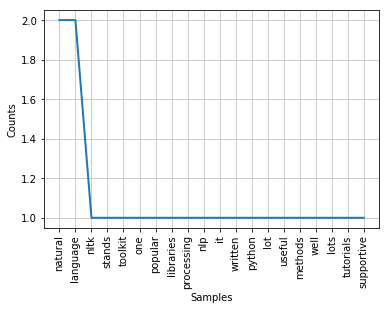

In [30]:
from nltk import FreqDist

frequence = FreqDist(noStopwords)

# this line displays the graph correctly
%matplotlib inline 
frequence.plot(20, cumulative=False)

The results of the following analysis are not that interesting, but NLTK understood that the text is about itself. Nice!

### Retrieving synonyms and antonyms

NLTK contains a database named **WordNet** that is built for natural languages. It includes groups of synonyms and antonyms that you can use during your analysis. Let's try to find synonyms and antonyms for first 5 words from our clean list:

In [50]:
from nltk.corpus import wordnet

for word in noStopwords[0:4]:
    foundWord = wordnet.synsets(word)
    if foundWord:
        print("WORD " + word)
        # shows definition of a word
        print("DEFINITION " + foundWord[0].definition())
        print("USAGE EXAMPLES ")
        # shows examples of usage
        print(foundWord[0].examples())
        
        synonyms = []
        antonyms = []
        
        # searches for synonyms and antonyms; in case there are some - returns them
        for syn in wordnet.synsets(word):
            for lemma in syn.lemmas():
                synonyms.append(lemma.name())
                
                if lemma.antonyms():
                    antonyms.append(lemma.antonyms()[0].name())
        
        print("SYNONYMS")
        print(synonyms)
        print("ANTONYMS")
        print(antonyms)
        print ("\n")
        

WORD stands
DEFINITION a support or foundation
USAGE EXAMPLES 
['the base of the lamp']
SYNONYMS
['base', 'pedestal', 'stand', 'stand', 'stand', 'stand', 'rack', 'stand', 'stand', 'standstill', 'tie-up', 'point_of_view', 'viewpoint', 'stand', 'standpoint', 'stall', 'stand', 'sales_booth', 'stand', 'stand', 'bandstand', 'outdoor_stage', 'stand', 'stand', 'stand', 'stand_up', 'stand', 'stand', 'stand', 'remain_firm', 'digest', 'endure', 'stick_out', 'stomach', 'bear', 'stand', 'tolerate', 'support', 'brook', 'abide', 'suffer', 'put_up', 'stand', 'stand', 'stand', 'stand', 'stand', 'stand_up', 'place_upright', 'resist', 'stand', 'fend', 'stand']
ANTONYMS
['sit', 'yield']


WORD natural
DEFINITION someone regarded as certain to succeed
USAGE EXAMPLES 
["he's a natural for the job"]
SYNONYMS
['natural', 'natural', 'cancel', 'natural', 'natural', 'natural', 'natural', 'natural', 'natural', 'natural', 'instinctive', 'natural', 'raw', 'rude', 'natural', 'natural', 'born', 'innate', 'lifelike',

As you can see, no information about toolkit and nltk were found, but we'll be fine - we still retrieved a lot of interesting information. No need to use dictionary or google translate when you have NLTK. :)

### Stemming and lemmatizing

Word stemming is removing affixes from words and return the root word. Many search engines use this approach when indexing pages, as people may write the same word differently, but they all will mean the same thing.

Word lemmatizing is the same thing as stemming, but the lemmatizing always returns a valid word.

In [56]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
 
# as you will see, stemmer will return quite interesting word, right?
word = "increases"

stemmer = PorterStemmer()
print(stemmer.stem(word))
 
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize(word))

increas
increase


### Part-Of-Speech tagging

For mor precise analysis you can use lots of features with part-of-speech tagging by NLTK. I will show you only the most common operation: tagging itself.

In [69]:
from nltk import pos_tag

taggedWords = pos_tag(noStopwords)
print(taggedWords)

[('nltk', 'RB'), ('stands', 'VBZ'), ('natural', 'JJ'), ('language', 'NN'), ('toolkit', 'NN'), ('one', 'CD'), ('popular', 'JJ'), ('libraries', 'NNS'), ('natural', 'JJ'), ('language', 'NN'), ('processing', 'NN'), ('nlp', 'IN'), ('it', 'PRP'), ('written', 'VBN'), ('python', 'JJ'), ('lot', 'NN'), ('useful', 'JJ'), ('methods', 'NNS'), ('well', 'RB'), ('lots', 'NNS'), ('tutorials', 'NNS'), ('supportive', 'VBP'), ('community', 'NN')]


As you see, NLTK tagged each word with it's part-of-speech. To see the list of available p-o-s, take a look here: https://medium.com/@gianpaul.r/tokenization-and-parts-of-speech-pos-tagging-in-pythons-nltk-library-2d30f70af13b

## Let's use some gained knowledge in practice!

### Chatbots

There is a module in NLTK called [**nltk.chat**](https://www.nltk.org/api/nltk.chat.html) which allows you to build simple yet working chatbot. Probably it's not the most intelligent one, but it definitely will work.

To create a simple chatbot, you will need **Chat** - class that contains chatting logic for your bot and **Reflections** - dictionary that contains input and output values, usually these are synonyms or different forms of the word, e.g., here are some default reflections:

`reflections = {
  "i am"       : "you are",
  "i was"      : "you were",
  "i"          : "you",
  "i'm"        : "you are"
}`

You can use default package reflections or create your own. There are also **pairs** - basically, these are dialogue sentences.

So, let's build our simple chatbot:

In [ ]:
from nltk.chat.util import Chat, reflections

pairs = [
    [
        r"my name is (.*)",
        ["Hello %1, How are you doing today?", "Nice to meet you, %1!"]
    ],
    [
        r"how are you?",
        ["I'm doing great, thanks! What about you?"]
    ],
    [
        r"i'm doing fine",
        ["Nice to hear that"]
    ],
    [
        r"good evening|hello",
        ["Hello!", "Hi!"]
    ],
    [
        r"it was nice to meet you, bye",
        ["See you soon!"]
    ],
    [
        r"who is the strongest man on the earth?",
        ["CHUCK NORRIS"]
    ],
    [
        r"(.*) university?",
        ["I'm studying at University of Latvia, I'm enjoying my time here!"]
    ]
]

def chatty():
        print("Hi, I'm your first chatbot. Let's chat!")
        chat = Chat(pairs, reflections)
        chat.converse()
        
if __name__ == "__main__":
    chatty()

Hi, I'm your first chatbot. Let's chat!
>hello
Hello!
>my name is test
Hello test, How are you doing today?
>i'm doing fine
Nice to hear that
>are you studying at the university?
I'm studying at University of Latvia, I'm enjoying my time here!
>it was nice to meet you, bye
See you soon!


Basically, we are creating a dictionary with phrases, create a main **Chat** class with dictionary and reflections and creating a conversation with **converse()** method. 

That's it! Enjoy your first chatbot!

### Gender finder by name

Let's try to implement a script that will try to guess your gender by your name. Hoping we'll get it right and won't offense anybody.

Importing all necessary packages:

In [70]:
import random

from nltk import NaiveBayesClassifier
from nltk.classify import accuracy
from nltk.corpus import names

Now let's extract the last N letters of the input word that will act as a features from which we will try to predict gender.

In [71]:
def extractLetters(name, N = 2):
   lastLetters = name[-N:]
   return {'feature': lastLetters.lower()}

Creating training data from available in NLTK datasets:

In [73]:
if __name__=='__main__':
    maleNames = [(name, 'male') for name in names.words('male.txt')]
    femaleNames = [(name, 'female') for name in names.words('female.txt')]
    data = (maleNames + femaleNames)

    random.seed(5)
    random.shuffle(data)

Let's enter some test data:

In [74]:
names = ['Karina', 'Ramzes', 'James', 'Gloria']

Defining number of training samples, let's use 90% of all available dataset:

In [98]:
importedData = int(0.9 * len(data))

Now let's test the model with the different number of end letters:

In [102]:
for i in range(1, 5):
    print('\nLast letter count:', i)
    features = [(extractLetters(n, i), gender) for (n, gender) in data]
    trainingData, testingData = features[:importedData], features[importedData:]
    classifier = NaiveBayesClassifier.train(trainingData)
    
    modelAccuracy = round(100 * accuracy(classifier, testingData), 2)
    print('Accuracy = ' + str(modelAccuracy) + '%')
    
    for name in names:
        print(name, '==>', classifier.classify(extractLetters(name, i)))


Last letter count: 1
Accuracy = 75.47%
Karina ==> female
Ramzes ==> male
James ==> male
Gloria ==> female

Last letter count: 2
Accuracy = 79.25%
Karina ==> female
Ramzes ==> male
James ==> male
Gloria ==> female

Last letter count: 3
Accuracy = 77.86%
Karina ==> female
Ramzes ==> female
James ==> male
Gloria ==> female

Last letter count: 4
Accuracy = 70.94%
Karina ==> female
Ramzes ==> female
James ==> male
Gloria ==> female


As you can see, the deeper it looks, the worse results become. The best option is to use 2 last letters. Precision is not the best, but it clearly sees me as a female, which is nice. :D Feel free to optimize this algorithm, the best will receive cookies.

In this algorithm NLTK built-in Naive Bayes Classifier algorithm was used.
The Naive Bayes algorithm is an intuitive method that uses the probabilities of each attribute belonging to each class to make a prediction. It is the supervised learning approach you would come up with if you wanted to model a predictive modeling problem probabilistically.

Naive bayes simplifies the calculation of probabilities by assuming that the probability of each attribute belonging to a given class value is independent of all other attributes. This is a strong assumption but results in a fast and effective method. [Source](https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/)

## Conclusion

As NLTK is a very huge library, I included only most needed and most used basic methods, as well as some easy yet interesting methods that would motivate you to dive into NLP more deeply. I really hope you've learned something.

NLTK is very useful but easy to understand at the same time. It supports many languages and can be used for both human and computer languages, as long as they are natural. It can help you to analyse text, write your own filters or chatbots, filter spam, as well as use some artificial intelligence tricks. Who knows, probably next Alexa or Google will be written by you.

## Additional and used sources
* http://www.nltk.org/howto/ - official NLTK how-to's
* https://likegeeks.com/nlp-tutorial-using-python-nltk/ - intro to NLP with NLTK
* https://towardsdatascience.com/build-your-first-chatbot-using-python-nltk-5d07b027e727 - chatbot tutorial with NLTK
* https://stackabuse.com/text-summarization-with-nltk-in-python/ - easy text summarization tutorial (processes like that do happen in search engines) using NLTK
* https://likegeeks.com/nlp-tutorial-using-python-nltk/ - NLTK basics
* https://www.tutorialspoint.com/artificial_intelligence_with_python/artificial_intelligence_with_python_nltk_package.htm - some more intelligent NLTK
* https://www.nltk.org - official NLTK docs
* https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk - NLP in search engine style using NLTK - calculating word weights, etc.
* https://towardsdatascience.com/spam-classifier-in-python-from-scratch-27a98ddd8e73 - spam classifier from scratch in NLTK

## How NLTK can help you at the university?

* One of the examples is my program for "Formal Grammars" course. 

In case you haven't had this course yet, consider this package to be your best friend during it, as it'll help you to easily parse any formal grammar and give you the correct answer. You will have only one task: to reduce the grammar correctly.

This example parses the grammar reduced by me and returns all possible parse trees for the word, as well as detects whether it belongs to the given grammar. This was the first time I found NLTK and I've never regret it ever since. :)

[Click here](https://colab.research.google.com/drive/1vULur3cAO4vmiqHhAECatmIhnTMnWm0z)